In [260]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold
from collections import Counter
from scipy.stats import pearsonr


In [268]:
#creating a dataframe from the dataset
df = pd.read_csv("HA1-DatasetScaled.tsv", sep="\t")

## Objetivo 1

In [269]:
#defining the X and y for the train test split
X = df.values[:,:81]
y = df.values[:,81] #critical_temp is the last column

#creates a matrix of correlations
corr_matrix = df.corr() 
#how much each attribute correlates with the critical_temp target variable value, the lower the value the least relevant the feature is
print(corr_matrix["critical_temp"].sort_values(ascending=False))

print(X.shape)
print(y.shape)

#Creating an independent Validation Set (IVS)
X_TRAIN, X_IVS, y_TRAIN, y_IVS = train_test_split(X, y, test_size=0.25, random_state=26)


critical_temp                  1.000000
wtd_std_ThermalConductivity    0.723885
range_ThermalConductivity      0.690854
std_ThermalConductivity        0.659737
range_atomic_radius            0.652120
                                 ...   
gmean_Density                 -0.539644
gmean_Valence                 -0.574771
mean_Valence                  -0.601432
wtd_gmean_Valence             -0.618376
wtd_mean_Valence              -0.634921
Name: critical_temp, Length: 82, dtype: float64
(21174, 81)
(21174,)


### Defining the range of values of the max_depth hyperparameter

In [208]:
#hyperparameter max depth

max_depth_values = [] #to alter hyperparameter max_depth

for i in range(1,30,3):
    max_depth_values.append(i)
       
print(max_depth_values) 

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28]


### Decision Tree Regressor with hyperparameter max_depth

In [214]:
#k-fold cross validation with stopping criteria max_depth 
for i in max_depth_values:
    kf = KFold(n_splits=10, shuffle=True)

    TRUTH=None
    PREDS=None
    
    for train_index, test_index in kf.split(X_TRAIN):
        X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
        y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
        
        model = DecisionTreeRegressor(max_depth=i,random_state=16)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
      
        if TRUTH is None:
            PREDS=preds
            TRUTH=y_test
        else:
            PREDS=np.hstack((PREDS, preds))
            TRUTH=np.hstack((TRUTH, y_test))
            
    
    print(f"Decision Tree Regressor with max_depth = {i}\n")
    print("The RVE is: ", explained_variance_score(TRUTH, PREDS))
    print("The rmse is: ", mean_squared_error(TRUTH, PREDS, squared=False))
    
    corr, pval = pearsonr(TRUTH, PREDS)

    print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))

    print("The Maximum Error is: ", max_error(TRUTH, PREDS))
    print("The Mean Absolute Error is: ", mean_absolute_error(TRUTH, PREDS),"\n\n")
    

Decision Tree Regressor with max_depth = 1

The RVE is:  0.5309561096889127
The rmse is:  23.408991355354622
The Correlation Score is is: 0.7287 (p-value=0.000000e+00)

The Maximum Error is:  175.52505396018637
The Mean Absolute Error is:  17.463968091943016 


Decision Tree Regressor with max_depth = 4

The RVE is:  0.7313332994013582
The rmse is:  17.716759232767046
The Correlation Score is is: 0.8552 (p-value=0.000000e+00)

The Maximum Error is:  162.53771649484537
The Mean Absolute Error is:  12.248681863956374 


Decision Tree Regressor with max_depth = 7

The RVE is:  0.8066077210526179
The rmse is:  15.03126644865506
The Correlation Score is is: 0.8982 (p-value=0.000000e+00)

The Maximum Error is:  184.35
The Mean Absolute Error is:  9.70794534845227 


Decision Tree Regressor with max_depth = 10

The RVE is:  0.8462780036357106
The rmse is:  13.401215415262667
The Correlation Score is is: 0.9204 (p-value=0.000000e+00)

The Maximum Error is:  184.35
The Mean Absolute Error is:  

### Linear Regression

In [235]:
#Linear Regression with k-fold cross validation 
kf = KFold(n_splits=10, shuffle=True)

TRUTH=None
PREDS=None

for train_index, test_index in kf.split(X_TRAIN):
    X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
    y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    if TRUTH is None:
        PREDS=preds
        TRUTH=y_test
    else:
        PREDS=np.hstack((PREDS, preds))
        TRUTH=np.hstack((TRUTH, y_test))
        

print(f"Linear Regression\n")
print("The RVE is: ", explained_variance_score(TRUTH, PREDS))
print("The rmse is: ", mean_squared_error(TRUTH, PREDS, squared=False))

corr, pval = pearsonr(TRUTH, PREDS)

print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))

print("The Maximum Error is: ", max_error(TRUTH, PREDS))
print("The Mean Absolute Error is: ", mean_absolute_error(TRUTH, PREDS),"\n\n")

Linear Regression

The RVE is:  0.7338844880678093
The rmse is:  17.632384786835757
The Correlation Score is is: 0.8567 (p-value=0.000000e+00)

The Maximum Error is:  176.05701931798137
The Mean Absolute Error is:  13.354145283698646 




### Defining the range of values of the min_samples_leaf hyperparameter

In [210]:
#hyperparameter min_samples_leaf 

min_samples_leaf_values = []

for i in range(1,60,6):
    min_samples_leaf_values.append(i)

print(min_samples_leaf_values)    

[1, 7, 13, 19, 25, 31, 37, 43, 49, 55]


### Decision Tree Regressor with hyperparameter min_samples_leaf

In [216]:
#k-fold cross validation with stopping criteria min_sample_leaf 

for i in min_samples_leaf_values:
    kf = KFold(n_splits=10, shuffle=True)

    TRUTH=None
    PREDS=None
    
    
    for train_index, test_index in kf.split(X_TRAIN):
        X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
        y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
        
        model = DecisionTreeRegressor(min_samples_leaf=i,random_state=16)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        preds_train = model.predict(X_train)
        
        
        if TRUTH is None:
            PREDS=preds
            TRUTH=y_test
        else:
            PREDS=np.hstack((PREDS, preds))
            TRUTH=np.hstack((TRUTH, y_test))
        
    
    
    
    print(f"Decision Tree Regressor with min_samples_leaf = {i}\n")
    print("The RVE is: ", explained_variance_score(TRUTH, PREDS))
    print("The rmse is: ", mean_squared_error(TRUTH, PREDS, squared=False))
    
    corr, pval = pearsonr(TRUTH, PREDS)

    print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))
    
    print("The Maximum Error is: ", max_error(TRUTH, PREDS))
    print("The Mean Absolute Error is: ", mean_absolute_error(TRUTH, PREDS),"\n\n")


Decision Tree Regressor with min_samples_leaf = 1

The RVE is:  0.8672337444573299
The rmse is:  12.454364352022552
The Correlation Score is is: 0.9330 (p-value=0.000000e+00)

The Maximum Error is:  184.35
The Mean Absolute Error is:  6.440891234439516 


Decision Tree Regressor with min_samples_leaf = 7

The RVE is:  0.8811132783425116
The rmse is:  11.785375373457049
The Correlation Score is is: 0.9393 (p-value=0.000000e+00)

The Maximum Error is:  171.27525
The Mean Absolute Error is:  6.630999373025378 


Decision Tree Regressor with min_samples_leaf = 13

The RVE is:  0.8734132123050791
The rmse is:  12.161036246356895
The Correlation Score is is: 0.9350 (p-value=0.000000e+00)

The Maximum Error is:  158.57692307692307
The Mean Absolute Error is:  6.962829619176944 


Decision Tree Regressor with min_samples_leaf = 19

The RVE is:  0.8697542290936975
The rmse is:  12.33591397308907
The Correlation Score is is: 0.9329 (p-value=0.000000e+00)

The Maximum Error is:  180.8289545454545

### Best Regression Model

In [243]:
#After validating the results we achieved the best model
best_model = DecisionTreeRegressor(min_samples_leaf = 13,random_state=16)
best_model.fit(X_TRAIN, y_TRAIN)

DecisionTreeRegressor(min_samples_leaf=13, random_state=16)

In [244]:
# best model validation with IVS
ivs_preds=best_model.predict(X_IVS)

print("The RVE is: ", explained_variance_score(y_IVS, ivs_preds))
print("The rmse is: ", mean_squared_error(y_IVS, ivs_preds, squared=False))
corr, pval=pearsonr(y_IVS, ivs_preds)
print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))

print("The Maximum Error is is: ", max_error(y_IVS, ivs_preds))
print("The Mean Absolute Error is: ", mean_absolute_error(y_IVS, ivs_preds))

The RVE is:  0.8779682971428481
The rmse is:  12.048725704889668
The Correlation Score is is: 0.9372 (p-value=0.000000e+00)

The Maximum Error is is:  109.49384615384615
The Mean Absolute Error is:  6.773300086827552


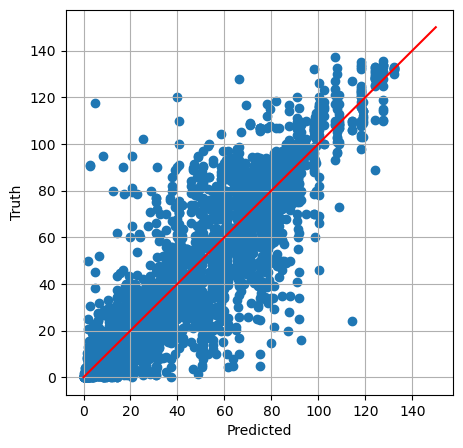

In [223]:

plt.figure(figsize=(5,5))
plt.scatter(ivs_preds, y_IVS)
plt.plot((0, 150), (0,150), c="r")
plt.grid()
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Objetivo 2

In [266]:
df_t = df

#adds a column to the dataframe with the value 1 when the critical_temp >= 80 and zero when its below 80
df_t['critical_temp_high'] = (df_t['critical_temp'] >= 80.0).astype(int)

print(df_t,"\n")

df_t = df_t.drop("critical_temp",axis=1)

print(df_t)

# summarize critical_temp_high distribution
counter = Counter(df_t['critical_temp_high'])
print(counter)
print('Positive critical_temp_high corresponds to', counter[1]/(counter[0]+counter[1])*100,'% of the dataset.\n')


#creates a matrix of correlations
corr_matrix = df_t.corr() 
#how much each attribute correlates with the critical_temp target variable value, the lower the value the least relevant the feature is
print(corr_matrix["critical_temp_high"].sort_values(ascending=False))


       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                 -2.1737           -2.5469               -1.8316   
1                 -2.1737           -2.5469               -1.8316   
2                 -2.1737           -2.5469               -1.8316   
3                 -2.1737           -2.5469               -1.8316   
4                 -2.1737           -1.5994               -0.9850   
...                   ...               ...                   ...   
21169             -1.4777           -1.5696               -1.3792   
21170             -1.4777           -1.5696               -1.3794   
21171              0.6104           -1.2091               -0.3571   
21172             -1.4777            2.3104                3.2518   
21173             -0.0856           -0.3717               -0.2152   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0                -1.9110                -1.2742              -3.2043   
1                -1.9110   

In [267]:
#defining the X and y for the train test split
Xt = df_t.values[:,:81]
yt = df_t.values[:,81] #critical_temp_high is the last column

print(Xt.shape)
print(yt.shape)

#Creating an independent Validation Set (IVS)
Xt_TRAIN, Xt_IVS, yt_TRAIN, yt_IVS = train_test_split(Xt, yt, test_size=0.25, random_state=26)

(21174, 81)
(21174,)


### Decision Tree Classifier with hyperparameter max_depth

In [218]:
#k-fold cross validation with stopping criteria max_depth 

for i in max_depth_values:
    kf = KFold(n_splits=10, shuffle=True)

    TRUTH=None
    PREDS=None
    
    for train_t_index, test_t_index in kf.split(Xt_TRAIN):
        Xt_train, Xt_test = Xt_TRAIN[train_t_index], Xt_TRAIN[test_t_index]
        yt_train, yt_test = yt_TRAIN[train_t_index], yt_TRAIN[test_t_index]
        
        model_t = DecisionTreeClassifier(max_depth=i,random_state=16)
        model_t.fit(Xt_train, yt_train)
        preds_t = model_t.predict(Xt_test)
      
        if TRUTH is None:
            PREDS=preds_t
            TRUTH=yt_test
        else:
            PREDS=np.hstack((PREDS, preds_t))
            TRUTH=np.hstack((TRUTH, yt_test))
    
    
    print(f"\nDecision Tree Classifier with max_depth = {i}\n")
    print("The accuracy score is: %7.4f" % accuracy_score(TRUTH, PREDS))
    print("The Precision is: %7.4f" % precision_score(TRUTH, PREDS))
    print("The Recall is: %7.4f" % recall_score(TRUTH, PREDS))
    print("The F1 score is: %7.4f" % f1_score(TRUTH, PREDS))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(TRUTH, PREDS))
    
    '''print("\nThis is the Confusion Matrix")
    print(f"{pd.DataFrame(confusion_matrix(TRUTH, PREDS))}\n")'''


Decision Tree Classifier with max_depth = 1

The accuracy score is:  0.8339
The Precision is:  0.0000
The Recall is:  0.0000
The F1 score is:  0.0000
The Matthews correlation coefficient is:  0.0000


c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Decision Tree Classifier with max_depth = 4

The accuracy score is:  0.8790
The Precision is:  0.6715
The Recall is:  0.5315
The F1 score is:  0.5933
The Matthews correlation coefficient is:  0.5283

Decision Tree Classifier with max_depth = 7

The accuracy score is:  0.9115
The Precision is:  0.7359
The Recall is:  0.7290
The F1 score is:  0.7324
The Matthews correlation coefficient is:  0.6794

Decision Tree Classifier with max_depth = 10

The accuracy score is:  0.9265
The Precision is:  0.7766
The Recall is:  0.7828
The F1 score is:  0.7797
The Matthews correlation coefficient is:  0.7356

Decision Tree Classifier with max_depth = 13

The accuracy score is:  0.9293
The Precision is:  0.7807
The Recall is:  0.7991
The F1 score is:  0.7898
The Matthews correlation coefficient is:  0.7474

Decision Tree Classifier with max_depth = 16

The accuracy score is:  0.9299
The Precision is:  0.7853
The Recall is:  0.7957
The F1 score is:  0.7904
The Matthews correlation coefficient is:  0.74

### Decision Tree Classifier with hyperparameter min_samples_leaf

In [219]:
#k-fold cross validation with stopping criteria min_sample_leaf 

for i in min_samples_leaf_values:
    kf = KFold(n_splits=10, shuffle=True)

    TRUTH=None
    PREDS=None
    
    for train_t_index, test_t_index in kf.split(Xt_TRAIN):
        Xt_train, Xt_test = Xt_TRAIN[train_t_index], Xt_TRAIN[test_t_index]
        yt_train, yt_test = yt_TRAIN[train_t_index], yt_TRAIN[test_t_index]
        
        model_t = DecisionTreeClassifier(min_samples_leaf=i,random_state=16)
        model_t.fit(Xt_train, yt_train)
        preds_t = model_t.predict(Xt_test)
      
        if TRUTH is None:
            PREDS=preds_t
            TRUTH=yt_test
        else:
            PREDS=np.hstack((PREDS, preds_t))
            TRUTH=np.hstack((TRUTH, yt_test))
    
    
    print(f"\nDecision Tree Classifier with min_samples_leaf = {i}\n")
    print("The accuracy score is: %7.4f" % accuracy_score(TRUTH, PREDS))
    print("The Precision is: %7.4f" % precision_score(TRUTH, PREDS))
    print("The Recall is: %7.4f" % recall_score(TRUTH, PREDS))
    print("The F1 score is: %7.4f" % f1_score(TRUTH, PREDS))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(TRUTH, PREDS))

    '''print("The Classification Report:\n", classification_report(TRUTH, PREDS))
    print("\nThis is the Confusion Matrix")
    print(f"{pd.DataFrame(confusion_matrix(TRUTH, PREDS))}\n")'''


Decision Tree Classifier with min_samples_leaf = 1

The accuracy score is:  0.9266
The Precision is:  0.7789
The Recall is:  0.7798
The F1 score is:  0.7793
The Matthews correlation coefficient is:  0.7353

Decision Tree Classifier with min_samples_leaf = 7

The accuracy score is:  0.9278
The Precision is:  0.7800
The Recall is:  0.7877
The F1 score is:  0.7839
The Matthews correlation coefficient is:  0.7406

Decision Tree Classifier with min_samples_leaf = 13

The accuracy score is:  0.9244
The Precision is:  0.7811
The Recall is:  0.7574
The F1 score is:  0.7691
The Matthews correlation coefficient is:  0.7240

Decision Tree Classifier with min_samples_leaf = 19

The accuracy score is:  0.9201
The Precision is:  0.7690
The Recall is:  0.7418
The F1 score is:  0.7552
The Matthews correlation coefficient is:  0.7076

Decision Tree Classifier with min_samples_leaf = 25

The accuracy score is:  0.9180
The Precision is:  0.7722
The Recall is:  0.7183
The F1 score is:  0.7443
The Matthew

### Logistic Regression with hyperparameter C

In [240]:
#a smaller c implies a stronger regularization, a larger c means a weaker regularization
C_values = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 1, 10, 100] # more lower values because we have a lot of features in this dataset, and so a stronger regularization helps prevents overfitting
C_values

[0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 1, 10, 100]

In [242]:
#k-fold cross validation with stopping criteria max_depth 

for i in C_values:
    kf = KFold(n_splits=10, shuffle=True)

    TRUTH=None
    PREDS=None
    
    for train_t_index, test_t_index in kf.split(Xt_TRAIN):
        Xt_train, Xt_test = Xt_TRAIN[train_t_index], Xt_TRAIN[test_t_index]
        yt_train, yt_test = yt_TRAIN[train_t_index], yt_TRAIN[test_t_index]
        
        model_t = LogisticRegression(C = i,random_state=16)
        model_t.fit(Xt_train, yt_train)
        preds_t = model_t.predict(Xt_test)
      
        if TRUTH is None:
            PREDS=preds_t
            TRUTH=yt_test
        else:
            PREDS=np.hstack((PREDS, preds_t))
            TRUTH=np.hstack((TRUTH, yt_test))
    
    
    print(f"\nLogistic Regression with C = {i}\n")
    print("The accuracy score is: %7.4f" % accuracy_score(TRUTH, PREDS))
    print("The Precision is: %7.4f" % precision_score(TRUTH, PREDS))
    print("The Recall is: %7.4f" % recall_score(TRUTH, PREDS))
    print("The F1 score is: %7.4f" % f1_score(TRUTH, PREDS))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(TRUTH, PREDS))
    
    '''print("\nThis is the Confusion Matrix")
    print(f"{pd.DataFrame(confusion_matrix(TRUTH, PREDS))}\n")'''


Logistic Regression with C = 0.001

The accuracy score is:  0.8618
The Precision is:  0.7367
The Recall is:  0.2619
The F1 score is:  0.3865
The Matthews correlation coefficient is:  0.3841

Logistic Regression with C = 0.002

The accuracy score is:  0.8642
The Precision is:  0.7319
The Recall is:  0.2877
The F1 score is:  0.4131
The Matthews correlation coefficient is:  0.4018

Logistic Regression with C = 0.005

The accuracy score is:  0.8705
The Precision is:  0.7299
The Recall is:  0.3503
The F1 score is:  0.4734
The Matthews correlation coefficient is:  0.4458

Logistic Regression with C = 0.01

The accuracy score is:  0.8731
The Precision is:  0.7051
The Recall is:  0.4060
The F1 score is:  0.5153
The Matthews correlation coefficient is:  0.4709

Logistic Regression with C = 0.02

The accuracy score is:  0.8751
The Precision is:  0.6953
The Recall is:  0.4420
The F1 score is:  0.5404
The Matthews correlation coefficient is:  0.4885


c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Logistic Regression with C = 0.05

The accuracy score is:  0.8751
The Precision is:  0.6655
The Recall is:  0.4985
The F1 score is:  0.5700
The Matthews correlation coefficient is:  0.5058


c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Logistic Regression with C = 0.1

The accuracy score is:  0.8857
The Precision is:  0.6796
The Recall is:  0.5902
The F1 score is:  0.6318
The Matthews correlation coefficient is:  0.5665


c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Logistic Regression with C = 1

The accuracy score is:  0.8908
The Precision is:  0.6899
The Recall is:  0.6224
The F1 score is:  0.6544
The Matthews correlation coefficient is:  0.5909


c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Logistic Regression with C = 10

The accuracy score is:  0.8927
The Precision is:  0.6914
The Recall is:  0.6395
The F1 score is:  0.6644
The Matthews correlation coefficient is:  0.6013


c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Logistic Regression with C = 100

The accuracy score is:  0.8911
The Precision is:  0.6854
The Recall is:  0.6368
The F1 score is:  0.6602
The Matthews correlation coefficient is:  0.5961


### Best Classification model


In [255]:
#After validating the results we achieved the best model
best_model_t = DecisionTreeClassifier(max_depth = 13,random_state=16)
best_model_t.fit(Xt_TRAIN, yt_TRAIN)

DecisionTreeClassifier(max_depth=13, random_state=16)

In [256]:
ivs_t_preds =best_model_t.predict(Xt_IVS)

print("The accuracy score is: %7.4f" % accuracy_score(yt_IVS, ivs_t_preds))
print("The Precision is: %7.4f" % precision_score(yt_IVS, ivs_t_preds))
print("The Recall is: %7.4f" % recall_score(yt_IVS, ivs_t_preds))
print("The F1 score is: %7.4f" % f1_score(yt_IVS, ivs_t_preds))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(yt_IVS, ivs_t_preds))

The accuracy score is:  0.9350
The Precision is:  0.8277
The Recall is:  0.7859
The F1 score is:  0.8063
The Matthews correlation coefficient is:  0.7677
